In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from sklearn.utils import shuffle
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
res = 128
IMAGE_SIZE = (res,res)
path="/content/drive/MyDrive/Data"
data=[]
c=0
for folder in os.listdir(path):
    sub_path=path+"/"+folder
    for img in os.listdir(sub_path):
      image_path=sub_path+"/"+img        
      img_arr=cv2.imread(image_path)
      try:
        img_arr=cv2.resize(img_arr,IMAGE_SIZE)
        img_arr = cv2.cvtColor(img_arr,cv2.COLOR_BGR2GRAY)
        # ret, img_arr = cv2.threshold(img_arr, 120, 255, cv2.THRESH_TOZERO)
        data.append(img_arr)
      except:
        c+=1
        continue
print("Number of images skipped= ",c)

Number of images skipped=  0


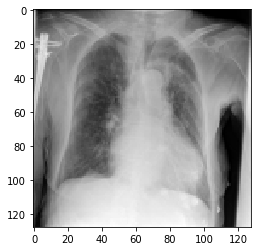

In [ ]:
plt.imshow(data[1], interpolation='nearest', cmap='gray')
plt.show()

In [ ]:
x = np.array(data)

In [ ]:
x = x/255.0

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255)
dataset = datagen.flow_from_directory(path,
                                      target_size = IMAGE_SIZE,
                                      batch_size = 32,
                                      class_mode = 'sparse')

Found 6693 images belonging to 2 classes.


In [ ]:
dataset.class_indices
y=dataset.classes
y.shape

(6693,)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2)

In [ ]:
x_val,y_val = shuffle(x_val,y_val)
x_train,y_train = shuffle(x_train,y_train)

In [ ]:
x_train.shape,y_train.shape

((4818, 128, 128), (4818,))

In [ ]:
x_val.shape,y_val.shape

((1205, 128, 128), (1205,))

In [ ]:
x_test.shape,y_test.shape

((670, 128, 128), (670,))

In [ ]:
model=Sequential()

#covolution layer
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(res,res,1)))
#pooling layer
model.add(MaxPooling2D(2,2))


#covolution layer
model.add(Conv2D(128,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))

#covolution layer
model.add(Conv2D(128,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))

#covolution layer
model.add(Conv2D(64,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))

#covolution layer
model.add(Conv2D(64,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))

#i/p layer
model.add(Flatten())

#o/p layer
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 128)     1280      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 128)     

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=2,shuffle=True)

Epoch 1/2
151/151 [==============================] - 387s 3s/step - loss: 0.6099 - accuracy: 0.6731 - val_loss: 0.4962 - val_accuracy: 0.7627
Epoch 2/2
151/151 [==============================] - 388s 3s/step - loss: 0.4364 - accuracy: 0.7960 - val_loss: 0.3641 - val_accuracy: 0.8382


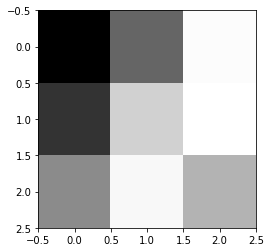

In [ ]:
top_layer = model.layers[0]
plt.imshow(top_layer.get_weights()[0][:, :, :, 0].squeeze(), cmap='gray')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


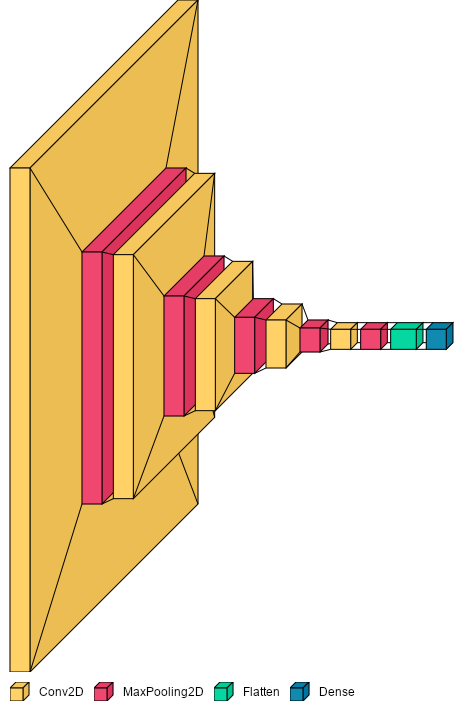

In [ ]:
!pip install visualkeras

import visualkeras
# visualkeras.layered_view(model, legend=True) # without custom font
from PIL import ImageFont
font = ImageFont.truetype("/content/drive/MyDrive/Arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font) # selected font

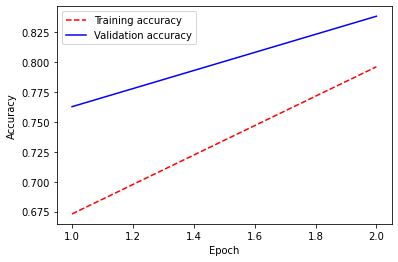

In [ ]:
# Get training and test loss histories
training_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

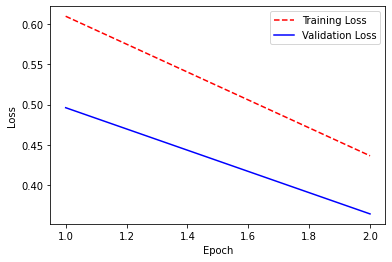

In [ ]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
y_val_pred=model.predict(x_val)
y_val_pred=np.argmax(y_val_pred,axis=1)
print(classification_report(y_val,y_val_pred,target_names=os.listdir("/content/drive/MyDrive/Data")))

              precision    recall  f1-score   support

       covid       0.81      0.92      0.86       660
      normal       0.89      0.73      0.80       545

    accuracy                           0.84      1205
   macro avg       0.85      0.83      0.83      1205
weighted avg       0.84      0.84      0.84      1205



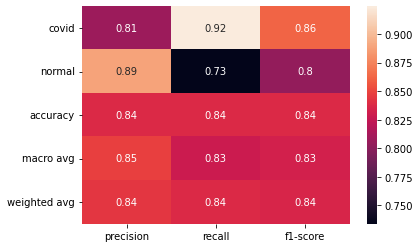

In [ ]:
import pandas as pd
import seaborn as sns
sns.heatmap(pd.DataFrame(classification_report(y_val,y_val_pred,output_dict=True,target_names=os.listdir("/content/drive/MyDrive/dataset"))).iloc[:-1, :].T, annot=True)

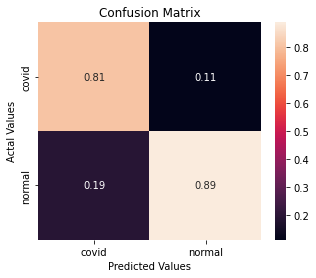

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Create confusion matrix and normalizes it over predicted (columns)
cm = confusion_matrix(y_val, y_val_pred , normalize='pred')
cm_df = pd.DataFrame(cm,
                     index = os.listdir("/content/drive/MyDrive/Data"), 
                     columns = os.listdir("/content/drive/MyDrive/Data"))
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
confusion_matrix(y_val_pred,y_val)

array([[610, 145],
       [ 50, 400]])

In [ ]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
print(classification_report(y_test,y_pred,target_names=os.listdir("/content/drive/MyDrive/Data")))
confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

       covid       0.80      0.93      0.86       362
      normal       0.89      0.72      0.80       308

    accuracy                           0.83       670
   macro avg       0.84      0.82      0.83       670
weighted avg       0.84      0.83      0.83       670



array([[335,  86],
       [ 27, 222]])

In [ ]:
!pip install shap 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the SHAP library
import shap

In [ ]:
# load JS visualization code to notebook
shap.initjs()

In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

In [ ]:
explanation = explainer.explain_instance(x_test[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

ValueError: ignored

In [ ]:
#https://towardsdatascience.com/interpreting-image-classification-model-with-lime-1e7064a2f2e5